# 2.6. Probability

In [14]:
import torch
from torch.distributions import multinomial
import matplotlib.pyplot as plt
import d2l_torch as d2l

In [3]:
fair_probs = torch.ones([6]) / 6

In [4]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [5]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 0., 0., 2., 1., 5.])

In [6]:
# Store the results as 32-bit floats for division
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000 # Relative frequency as the estimate

tensor([0.1710, 0.1630, 0.1670, 0.1650, 0.1800, 0.1540])

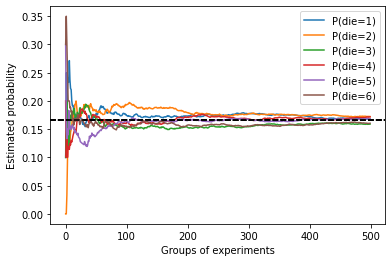

In [9]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
# plt.set_figsize((6, 4.5))
for i in range(6):
    plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
    plt.axhline(y=0.167, color='black', linestyle='dashed')
    plt.gca().set_xlabel('Groups of experiments')
    plt.gca().set_ylabel('Estimated probability')
    plt.legend();

--- 